In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [35]:
df = pd.read_csv('AirPassengers.csv',usecols=[1])
df.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [36]:
df.rename(columns = {'#Passengers':'Passengers'}, inplace = True)
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [37]:
plt.style.use('dark_background')

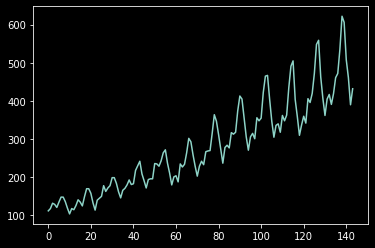

In [38]:
plt.plot(df)

In [39]:
dataset = df.values
dataset = dataset.astype('float32')

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [ ]:
print(dataset)

#splitting data

In [42]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [43]:
train.shape

(95, 1)

In [44]:
test.shape

(49, 1)

In [45]:
def to_sequences(dataset,seq_size=1):
  x=[]
  y=[]
  for i in range(len(dataset)-seq_size-1):
    window = dataset[i:(i+seq_size),0]
    x.append(window)
    y.append(dataset[i+seq_size,0])

  return np.array(x),np.array(y)

In [46]:
seq_size = 5

In [47]:
trainX,trainY=to_sequences(train,seq_size)
testX,testY=to_sequences(test,seq_size)

In [ ]:
print(train)

In [ ]:
print(trainX)

In [ ]:
print(trainY)

In [51]:
print("shape of training set: {}".format(trainX.shape))

shape of training set: (89, 5)


In [52]:
print("shape of test set: {}".format(testX.shape))

shape of test set: (43, 5)


#Model

In [55]:
model= Sequential()
model.add(Dense(64,input_dim=seq_size,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [58]:
model.fit(trainX,trainY,verbose=1, epochs=100,validation_data=(testX,testY))

Epoch 1/100
3/3 [==============================] - 3s 97ms/step - loss: 0.0635 - accuracy: 0.0112 - val_loss: 0.2767 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.0112 - val_loss: 0.1631 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0196 - accuracy: 0.0112 - val_loss: 0.0892 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0100 - accuracy: 0.0112 - val_loss: 0.0493 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0069 - accuracy: 0.0112 - val_loss: 0.0331 - val_accuracy: 0.0233
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0071 - accuracy: 0.0112 - val_loss: 0.0290 - val_accuracy: 0.0233
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0079 - accuracy: 0.0112 - val_loss: 0.0277 - val_accuracy: 0.0233
Epoc

#Predictions

In [59]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [60]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [63]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 19.87 RMSE


In [64]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 44.33 RMSE


#forecasting

In [65]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [66]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

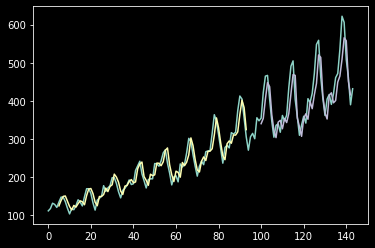

In [67]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()